FORD_CAR_SALES_PREDICTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow

In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/Car_sales.csv",parse_dates=True)
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
data = data.drop(['Vehicle_type'],axis=1)

In [ ]:
data

,Manufacturer,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,NaN,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,15.245,NaN,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,17.531,NaN,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,3.493,NaN,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
data.isna().any()

Manufacturer           False
Sales_in_thousands     False
__year_resale_value     True
Price_in_thousands      True
Engine_size             True
Horsepower              True
Wheelbase               True
Width                   True
Length                  True
Curb_weight             True
Fuel_capacity           True
Fuel_efficiency         True
Latest_Launch          False
Power_perf_factor       True
dtype: bool

In [ ]:
data1=int(data['__year_resale_value'].mean())
data['__year_resale_value'= data['__year_resale_value'].fillna(data1)]
data1 

SyntaxError: ignored

In [ ]:
data.count()

Manufacturer           157
Sales_in_thousands     157
__year_resale_value    121
Vehicle_type           157
Price_in_thousands     155
Engine_size            156
Horsepower             156
Wheelbase              156
Width                  156
Length                 156
Curb_weight            155
Fuel_capacity          156
Fuel_efficiency        154
Latest_Launch          157
Power_perf_factor      155
dtype: int64

In [ ]:
train_data=data[data['Date']<'2019-01-01'].copy()
test_data=data[data['Date']>='2019-01-01'].copy()

In [ ]:
len(train_data),len(test_data)

(5072, 7366)

In [ ]:
training_data=train_data.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
85,2.161330,2.173495,2.157275,2.165385,712079
86,2.165385,2.165385,2.128890,2.132945,835383
87,2.132945,2.149165,2.128890,2.128890,795309
88,2.128890,2.128890,2.108615,2.116725,650427
89,2.116725,2.120780,2.080229,2.116725,1103568


In [ ]:
len(training_data)

5072

In [ ]:
training_data.shape

(5072, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
training_data=scaler.fit_transform(training_data)

In [ ]:
training_data.shape[0]

5072

In [ ]:
X_train=[]
y_train=[]
timestamp=7
for i in range(timestamp,len(training_data)):
    X_train.append(training_data[i-timestamp:i])
    y_train.append(training_data[i,3])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [ ]:
X_train.shape,y_train.shape

((5065, 7, 5), (5065,))

In [ ]:
X_train.shape[0],X_train.shape[1]

(5065, 7)

building model


In [ ]:
timestep=7
n_features=5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Flatten,Dropout

In [ ]:
model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(timestep,n_features)))
model.add(LSTM(units=30,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=78,activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics="accuracy")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 60)             15840     
_________________________________________________________________
lstm_5 (LSTM)                (None, 7, 30)             10920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 30)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 7, 60)             21840     
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 60)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 78)                43368     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [ ]:
hist=model.fit(X_train,y_train,epochs=10,batch_size=60)

Epoch 1/10
85/85 [==============================] - 6s 23ms/step - loss: 0.0181 - accuracy: 3.9487e-04
Epoch 2/10
85/85 [==============================] - 2s 23ms/step - loss: 9.6513e-04 - accuracy: 3.9487e-04
Epoch 3/10
85/85 [==============================] - 2s 23ms/step - loss: 8.1017e-04 - accuracy: 3.9487e-04
Epoch 4/10
85/85 [==============================] - 2s 24ms/step - loss: 7.5231e-04 - accuracy: 3.9487e-04
Epoch 5/10
85/85 [==============================] - 2s 24ms/step - loss: 7.9991e-04 - accuracy: 3.9487e-04
Epoch 6/10
85/85 [==============================] - 2s 23ms/step - loss: 6.8705e-04 - accuracy: 3.9487e-04
Epoch 7/10
85/85 [==============================] - 2s 23ms/step - loss: 6.8031e-04 - accuracy: 3.9487e-04
Epoch 8/10
85/85 [==============================] - 2s 23ms/step - loss: 6.3399e-04 - accuracy: 3.9487e-04
Epoch 9/10
85/85 [==============================] - 2s 23ms/step - loss: 6.5789e-04 - accuracy: 3.9487e-04
Epoch 10/10
85/85 [======================

In [ ]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/1/1972,0.000000,2.173495,2.149165,2.153220,0.277406,1091238
1,6/2/1972,2.153220,2.173495,2.141055,2.149165,0.276884,1174468
2,6/5/1972,2.149165,2.169440,2.141055,2.149165,0.276884,5209582
3,6/6/1972,2.149165,2.157275,2.116725,2.124835,0.273750,1424158
4,6/7/1972,2.124835,2.137000,2.112670,2.112670,0.272182,675088


In [ ]:
last_30_data=train_data.tail(30)

In [ ]:
df=last_30_data.append(test_data,ignore_index=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/14/2021,9.81,10.20,9.79,10.17,10.17,112695300
1,1/15/2021,10.04,10.05,9.82,9.83,9.83,99985000
2,1/19/2021,10.06,10.21,9.97,10.02,10.02,78732800
3,1/20/2021,10.23,10.87,10.19,10.86,10.86,125033200
4,1/21/2021,11.28,12.15,11.12,11.53,11.53,282394100


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.shape

(7396, 5)

In [ ]:
testing_data=scaler.transform(df)
testing_data

array([[0.26030137, 0.26608036, 0.26527268, 0.27158414, 0.23374831],
       [0.26683286, 0.26190161, 0.2661423 , 0.26189108, 0.20729609],
       [0.26740081, 0.26635894, 0.2704904 , 0.26730779, 0.16306678],
       ...,
       [0.34861841, 0.35494842, 0.35571314, 0.35882164, 0.15692984],
       [0.36082945, 0.36469884, 0.36759795, 0.37250596, 0.14220373],
       [0.36963275, 0.37027051, 0.37687389, 0.37450158, 0.118441  ]])

In [ ]:
testing_data.shape

(7396, 5)

In [ ]:
testing_data.shape[0]

7396

In [ ]:
len(testing_data)

7396

In [ ]:
timestep=7
X_test,y_test=[],[]
for i in range(timestep,len(testing_data)):
    X_test.append(testing_data[i-timestep:i])
    y_test.append(testing_data[i,3])

In [ ]:
X_test,y_test=np.array(X_test),np.array(y_test)
X_test.shape,y_test.shape

((7389, 7, 5), (7389,))

In [ ]:
y_pred=model.predict(X_test)
y_pred.shape

(7389, 1)

In [ ]:
scaler.scale_

array([2.83977608e-02, 2.78583286e-02, 2.89873271e-02, 2.85089874e-02,
       2.08116398e-09])

In [ ]:
scale=1/2.71595325e-02
scale

36.819485018749866

In [ ]:
y_pred=y_pred*scale
y_test=y_test*scale

In [ ]:
import matplotlib.pyplot as plt

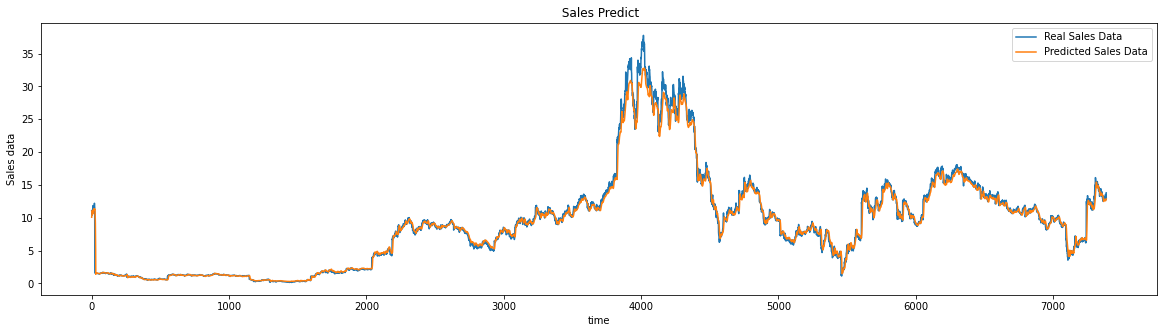

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test,label='Real Sales Data')
plt.plot(y_pred,label='Predicted Sales Data')
plt.title(' Sales Predict')
plt.xlabel('time')
plt.ylabel('Sales data')
plt.legend()
